In [1]:
using DynamicalSystems, DifferentialEquations, OrdinaryDiffEq, StaticArrays

X = u = Y= 0..1
E = 0..20
box = E × X × u × Y

using CairoMakie

In [2]:
τ = 0.013
α = 1.5
J = 3.07
τ_D = 0.15
U0 = 0.35
τ_F = 1
ΔU0 = 0.305
τ_y = 1.8
β = 0.4375
xthr = 0.9
ythr = 0.5
I0 = -1.41

-1.41

In [3]:
U(y) = U0 + ΔU0 / ( 1 + exp( -50 * ( y - ythr ) ) )
σ(x)= 1 / (1 + exp(-20 * (x - xthr)))

σ (generic function with 1 method)

In [4]:
function model(u, p ,t)
    
    E, x, u_, y = u
    τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, I0 = p
    
    du1 = (-E + α * log( 1 + exp( ( J * u_ * x * E + I0 ) / α ) )) / τ
    du2 = ( 1 - x ) / τ_D - u_ * x * E
    du3 = (U(y) - u_) / τ_F + U(y) * ( 1 - u_ ) * E
    du4 = -y /  τ_y + β * σ(x)
    
    return SVector(du1, du2, du3, du4)
    
end

model (generic function with 1 method)

In [42]:
p = SA[τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, I0]

u0 = SA[19.93089048297771, 0.6092619359022491, 0.6855635929484172, 0.101194789452736184] # SA[3.3403239669724387, 0.1, 0.1, 0.03677942307955071]
tspan = (0.0, 500.0)

ds = ContinuousDynamicalSystem(model, u0, p)

println(ds.p)
tr = trajectory(ds, tspan[2], Ttr = tspan[2]/2; Δt = 0.001, diffeq = (alg = RK4(),  adaptive = false, dt = 0.001))

[0.013, 1.5, 0.15, 3.07, 0.35, 0.305, 1.8, 0.4375, 0.9, 0.5, -1.41]


4-dimensional Dataset{Float64} with 500001 points
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
  ⋮                       
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-5
 10.2167  0.432  0.85795  6.77978e-

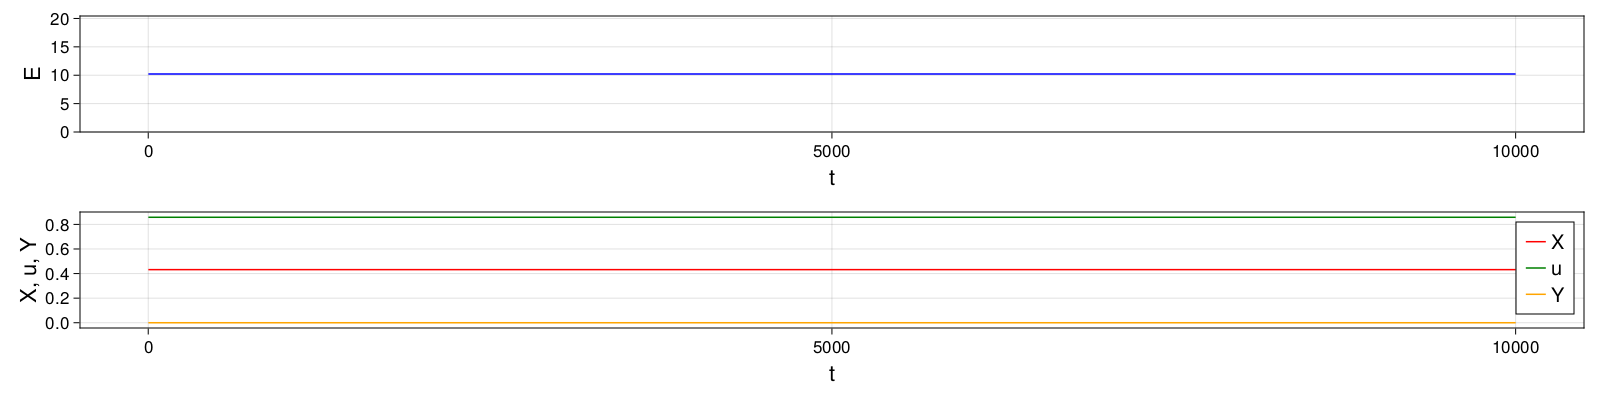

In [43]:
f = Figure(resolution = (1600, 400))

ax1 = Axis(f[1, 1], xlabel = "t", ylabel = "E", xlabelsize = 22, ylabelsize = 22,xticklabelsize = 17, yticklabelsize = 17)
ax2 = Axis(f[2, 1], xlabel = "t", ylabel = "X, u, Y", xlabelsize = 22, ylabelsize = 22,xticklabelsize = 17, yticklabelsize = 17)

ts, tf = 1, 10000

lines!(ax1, tr[ts:tf, 1], color = "blue", label = "E")

lines!(ax2, tr[ts:tf, 2], color = "red", label = "X")
lines!(ax2, tr[ts:tf, 3], color = "green", label = "u")
lines!(ax2, tr[ts:tf, 4], color = "orange", label = "Y")

axislegend(ax2, labelsize=20)
f

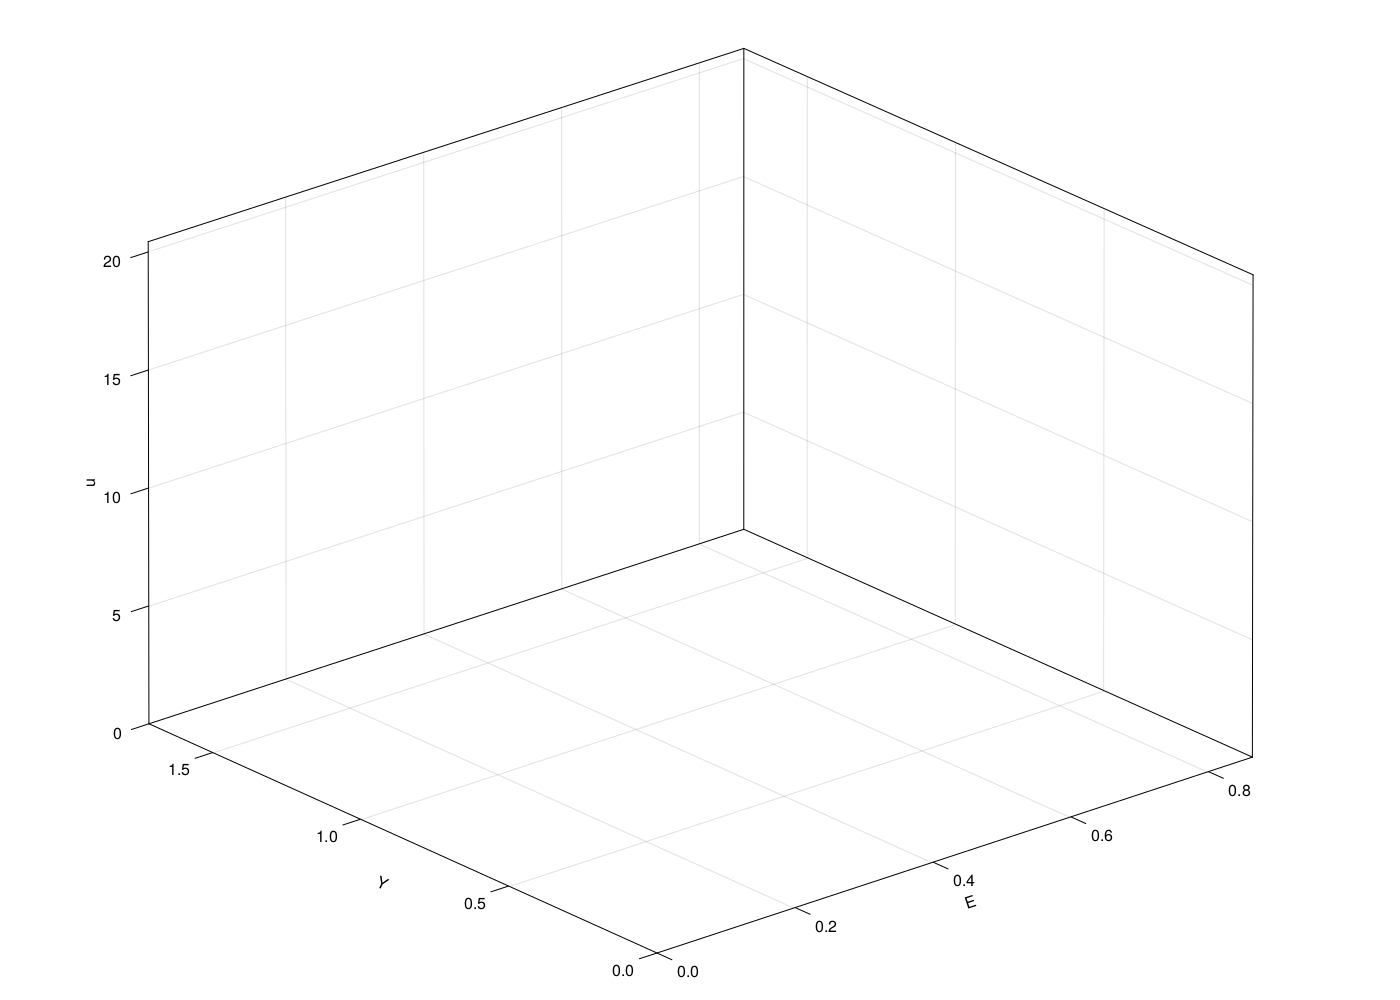

In [7]:
f = Figure(resolution = (1400, 1000))
ts, tf = 1, 10000
ax = Axis3(f[1, 1], xlabel = "E", ylabel = "Y", zlabel = "u")
lines!(tr[ts:tf, 2], tr[ts:tf, 3], tr[ts:tf, 1], linewidth = 1)
f

In [8]:
X = u =  Y = range(0.0, 1.0; length = 10)
E = range(0.0, 20.0; length = 10)

0.0:2.2222222222222223:20.0

In [9]:
mapper = AttractorsViaRecurrences(ds, (E, X, u, Y), Δt = 0.001;
                                    diffeq = (alg = RK4(),  adaptive = false, dt = 0.001))

AttractorsViaRecurrences
 rule f:      model
 type:        ODEIntegrator
 attractors:  Dict{Int16, Dataset{4, Float64}}()
 grid:        (0.0:2.2222222222222223:20.0, 0.0:0.1111111111111111:1.0, 0.0:0.1111111111111111:1.0, 0.0:0.1111111111111111:1.0)


In [10]:
basins, attractors = basins_of_attraction(mapper)
attractors

┌ Info: AttractorsViaRecurrences found new attractor with id: 1
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\basins\attractor_mapping_recurrences.jl:412
┌ Info: AttractorsViaRecurrences found new attractor with id: 2
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\basins\attractor_mapping_recurrences.jl:412
┌ Info: AttractorsViaRecurrences found new attractor with id: 3
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\basins\attractor_mapping_recurrences.jl:412
┌ Info: AttractorsViaRecurrences found new attractor with id: 4
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\basins\attractor_mapping_recurrences.jl:412
┌ Info: AttractorsViaRecurrences found new attractor with id: 5
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\basins\attractor_mapping_recurrences.jl:412
┌ Info: AttractorsViaRecurrences found new attractor with id: 6
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\

Basins of attraction:  37%|███████████                  |  ETA: 0:00:05┌ Info: AttractorsViaRecurrences found new attractor with id: 50
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\basins\attractor_mapping_recurrences.jl:412
┌ Info: AttractorsViaRecurrences found new attractor with id: 51
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\basins\attractor_mapping_recurrences.jl:412
┌ Info: AttractorsViaRecurrences found new attractor with id: 52
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\basins\attractor_mapping_recurrences.jl:412
┌ Info: AttractorsViaRecurrences found new attractor with id: 53
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\basins\attractor_mapping_recurrences.jl:412
┌ Info: AttractorsViaRecurrences found new attractor with id: 54
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\basins\attractor_mapping_recurrences.jl:412
┌ Info: AttractorsViaRecurrences found new attractor w

┌ Info: AttractorsViaRecurrences found new attractor with id: 96
└ @ ChaosTools C:\Users\Alex\.julia\packages\ChaosTools\PHPDF\src\basins\attractor_mapping_recurrences.jl:412
Basins of attraction: 100%|█████████████████████████████| Time: 0:00:07


Dict{Int16, Dataset{4, Float64}} with 96 entries:
  5  => 4-dimensional Dataset{Float64} with 4 points
  56 => 4-dimensional Dataset{Float64} with 1 points
  35 => 4-dimensional Dataset{Float64} with 22 points
  55 => 4-dimensional Dataset{Float64} with 1 points
  60 => 4-dimensional Dataset{Float64} with 1 points
  30 => 4-dimensional Dataset{Float64} with 2 points
  32 => 4-dimensional Dataset{Float64} with 1 points
  6  => 4-dimensional Dataset{Float64} with 2 points
  67 => 4-dimensional Dataset{Float64} with 1 points
  45 => 4-dimensional Dataset{Float64} with 1 points
  73 => 4-dimensional Dataset{Float64} with 2 points
  64 => 4-dimensional Dataset{Float64} with 2 points
  90 => 4-dimensional Dataset{Float64} with 2 points
  4  => 4-dimensional Dataset{Float64} with 1 points
  13 => 4-dimensional Dataset{Float64} with 8 points
  54 => 4-dimensional Dataset{Float64} with 1 points
  63 => 4-dimensional Dataset{Float64} with 1 points
  86 => 4-dimensional Dataset{Float64} with 1 po

In [38]:
length( attractors[1])

4

In [34]:
COLORS = [
    "#1B1B1B",
    "#6D44D0",
    "#2CB3BF",
    "#DA5210",
    "#03502A",
    "#866373",
    "white",
    "blue",
]

8-element Vector{String}:
 "#1B1B1B"
 "#6D44D0"
 "#2CB3BF"
 "#DA5210"
 "#03502A"
 "#866373"
 "white"
 "blue"

In [ ]:
# 3 quadrant 
fig = Figure()
ax = Axis3(fig[1,1])

for i in keys(attractors)
    
    tr = attractors[i]
    color = "black"
    
    idxs = [2,3,1]
    
    x,y,z = columns(tr)[idxs]
    scatter!(ax, x,y,z; color =color)
    
    tr = trajectory(ds, tspan[2], Ttr = tspan[2]/2; Δt = 0.001, diffeq = (alg = RK4(),  adaptive = false, dt = 0.001))
    
    x,y,z = columns(tr)[idxs]
    
    lines!(ax, x,y,z; linewidth = 1.0, color = color)

end

fig